### Importando as bibliotecas

In [1]:
import netpixi
from netpixi.integration.gt import Graph
from netpixi.integration.gt import *
import seaborn as sns
from regression.integration.gt import *

<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()
<frozen importlib._bootstrap>:914: ImportWarning: VendorImporter.find_spec() not found; falling back to find_module()


### Criando o grafo

In [2]:
g = Graph(directed=False) # não-dirigido

with open('facebook_combined.txt', "r") as arquivo:
    teste = arquivo.readline()
    lista = []
    while teste:
        linha = teste.split()
        node1 = linha[0]
        node2 = linha[1]
            
        if node1 not in lista:
            lista.append(node1)
            g.add_vertex(node1)
        
        if node2 not in lista:
            lista.append(node2)
            g.add_vertex(node2)
        
        g.add_edge(node1, node2)
        
        teste = arquivo.readline()

### Salvando o grafo

In [3]:
gt_save(g, 'facebook.net.gz')

### Compilando e renderizando o grafo

In [4]:
g = gt_load('facebook.net.gz')
r = netpixi.render('facebook.net.gz')

### Melhorando visualmento o grafo

In [5]:
# mudar a cor de fundo do grafo
r.graph(color=0xffffff)

# mudar a cor e o tamanho dos vértices
r.vertex_default(color=0x000000, size=10)

# mudar um vértice específico a partir de seu id
r.vertex(0, color=0xff0000, size=20)
r.vertex(1, color=0xff0000, size=20)

# mudar a cor, a espessura e a curvatura das arestas
r.edge_default(color=0x000000, width=1, curve1=1, curve2=1)

# mudar uma aresta específica a partir dos ids de sua origem e destino
r.edge(0, 1, color=0x0000ff, width=2)

### Análise exploratória do grafo

In [6]:
# Números de vértices

n = g.num_vertices()
n

4039

In [7]:
# Número de arestas

m = g.num_edges()
m

88234

In [8]:
# Número máximo possível de arestas

if g.is_directed():
    max_edges = n * (n - 1)
else:
    max_edges = n * (n - 1) // 2
max_edges

8154741

In [9]:
# Densidade

d = m / max_edges
d

0.010819963503439287

In [10]:
# Propriedades de cada vértice

data = gt_data(g)

""
id
0
1
2
3
4
...
4034
4035
4036


In [11]:
# Degree

degrees = []
for v in g.all_vertices():
    degrees.append(v.total_degree())
    
data['degree'] = degrees
data

,degree
id,
0,347
1,17
2,10
3,17
4,10
...,...
4034,2
4035,1
4036,2


count    4039.000000
mean       43.691013
std        52.420605
min         1.000000
25%        11.000000
50%        25.000000
75%        57.000000
max      1045.000000
Name: degree, dtype: float64

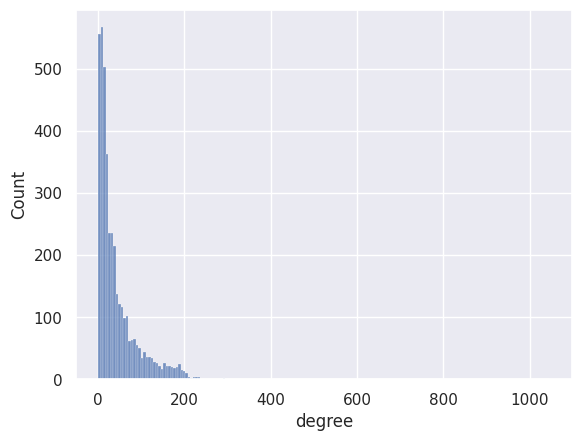

In [12]:
# Histograma do degree

sns.histplot(data['degree'])
data['degree'].describe()

### Limpando o grafo

In [ ]:
g = gt_clean(g)
m = gt_draw.sfdp_layout(g)
gt_move(g, m)
gt_save(g, 'facebook.net.gz')
netpixi.render('facebook.net.gz', infinite=True);g = gt_clean(g)
m = gt_draw.sfdp_layout(g)
gt_move(g, m)
gt_save(g, 'facebook.net.gz')
netpixi.render('facebook.net.gz', infinite=True);